# Table of Contents
[1. Objectives and Structure](#1)<br>
[2. Data Sets](#2)<br>
[3. Demo](#3)<br>
&nbsp;&nbsp;&nbsp;[3.1 Feature Engineering and Data Cleaning](#4)<br>
&nbsp;&nbsp;&nbsp;[3.2 Univariate Analysis](#5)<br>
&nbsp;&nbsp;&nbsp;[3.3 Multivariate Analysis](#6)<br>
[4. Firmo](#7)<br>
&nbsp;&nbsp;&nbsp;[4.1 Feature Engineering and Data Cleaning](#8)<br>
&nbsp;&nbsp;&nbsp;[4.2 Univariate Analysis](#9)<br>
&nbsp;&nbsp;&nbsp;[4.3 Multivariate Analysis](#10)<br>

<hr class="solid">

# 1. Objectives and Structure
<a id="1"></a> 


**Main goal:** produce a  comprehensive  report  that  identifies  the  **main  customer  segments**,  accompanied  by  a **preliminary marketing plan** that will serve as a guide for future initiatives.

- Costumer Value segmentation
- Costumer Behavior segmentation

**Structure**
- **Exploration**: Population description  using statistical measures, visualizations, and business insights that reflect the most significant findings.
<br></br>
- **Preprocessing:** steps to transform raw data into prepared data for clustering:<br> &nbsp;&nbsp;-data cleaning, <br>&nbsp;&nbsp;-transformation(feature engineering)<br>&nbsp;&nbsp;-reduction.
<br></br>
- **Modelling:**  Implementation  of ML models.<br> &nbsp;&nbsp; **Obligatory:** costumer value & consumer  behavior

<hr class="solid">


# 2. Data Sets
<a id="2"></a> 

### Firmo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Date_Adherence | Date of customer adherence to company’s card |
| Recency | Number of days since the customer's last purchase |
| MntMeat&Fish | Amount spent on meat and fish dishes |
| MntEntries | Amount spent on entries |
| MntVegan&Vegetarian | Amount spent on Vegan and Vegetarian dishes |
| MntDrinks | Amount spent on drinks |
| MntDesserts | Amount spent on desserts |
| MntAdditionalRequests | Amount spent on additional requests |
| NumOfferPurchases | Number of purchases made using promotional offers |
| NumAppPurchases | Number of purchases made through food delivery apps |
| NumTakeAwayPurchases | Number of take-away purchases |
| NumInStorePurchases | Number of in-store purchases |
| NumAppVisitsMonth | Average number of accesses to the restaurant in food delivery apps |
| Complain | Flag indicating whether the customer has made a complaint |


### Demo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Name | Customer’s name |
| Birthyear | Customer’s year of birth |
| Education | Customer’s level of education |
| Marital_Status | Customer’s marital status |
| Income | Customer’s yearly household income |
| Kid_Younger6 | Number of kids younger than 6 in the household |
| Children_6to18 | Number of children between 6 and 18 years old in the household |


### Marketing

| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Response_Cmp1 | Flag indicating whether the customer accepted the offer in campaign 1 |
| Response_Cmp2 | Flag indicating whether the customer accepted the offer in campaign 2 |
| Response_Cmp3 | Flag indicating whether the customer accepted the offer in campaign 3 |
| Response_Cmp4 | Flag indicating whether the customer accepted the offer in campaign 4 |
| Response_Cmp5 | Flag indicating whether the customer accepted the offer in campaign 5 |

<hr class="solid">

### Imports
<a id="3"></a> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import os
pd.set_option('display.max_columns', None)

In [2]:
demo = pd.read_csv('https://raw.githubusercontent.com/EFSA-Jedi-Group/Data-Science-and-ML/main/Data/crm.csv')
mkt = pd.read_csv('https://raw.githubusercontent.com/EFSA-Jedi-Group/Data-Science-and-ML/main/Data/mkt.csv')
sales = pd.read_csv('https://raw.githubusercontent.com/EFSA-Jedi-Group/Data-Science-and-ML/main/Data/sales.csv')
#df = demo.merge(sales).merge(mkt)

demo = demo.set_index('CustomerID')
mkt = mkt.set_index('CustomerID')
sales = sales.set_index('CustomerID')
#df = demo.merge(sales).merge(mkt)


<hr class="solid">

#  3. Demo
<a id="3"></a> 

#### 3.1 Feature Engineering and Data Cleaning
<a id="4"></a> 

##### Duplicates and NA

In [3]:
# Check duplicates
demo[demo.duplicated()].shape[0]
# Check NA - 14 on Education
demo.isnull().sum()

Name               0
Birthyear          0
Education         14
Marital_Status     0
Income             0
Kid_Younger6       0
Children_6to18     0
dtype: int64

##### Gender Column

In [4]:
demo['Gender'] = np.where(demo['Name'].str.contains('Mr.'), 'M', 'F')

##### Age Column

In [5]:
demo['Age'] = datetime.now().year - demo.Birthyear

##### Education

* Deal with Na - Fill with most frequent value?

* H1 - Divide Education in 3 labels: - Education_bins
    - High - Phd and Master
    - Medium - Graduation
    - Low - Basic + Highschool

In [6]:
#H1
demo.Education = demo.Education.str.title() 
demo['Education_bins'] = demo.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Medium',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

##### Marital Status
* H1 - Merge into 2 categories: Together(Married + Together) & Alone(Single + Divorced + Widow) - Marital_Status_2
* H2 - Just merge Married + Together - Marital_Status_4

In [7]:
demo.Marital_Status = demo.Marital_Status.str.title()
demo.Marital_Status.value_counts()

#H1
demo['Marital_Status_2'] = demo.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Alone',
    'Divorced' : 'Alone',
    'Widow' : 'Alone'
})
#H2
demo['Marital_Status_4'] = demo.Marital_Status.replace('Together','Married')


##### Income
* H1 -  Use as is (treat it as a discrete quantitative var - all values are ints)
* H2 - Bin it into 3 categories - Income_bins

In [8]:
# H1 -  Min-Max scaling 

demo_copy = demo.copy()
min_income = min(demo_copy['Income'])
max_income = max(demo_copy['Income'])

income_norm = [(x - min_income) / (max_income - min_income) for x in demo_copy['Income']]

In [9]:
demo_copy['Income'] = income_norm
demo_copy.head()

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4
CustomerID,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,0.473975,0,0,F,42,Medium,Alone,Single
19070,Miss Grace Black,1974,Graduation,Together,0.475463,0,0,F,49,Medium,Together,Married
29888,Mr. Gavin Morrison,1960,Phd,Together,0.480477,0,0,M,63,High,Together,Married
12221,Mr. Ryan Glover,1980,Graduation,Married,0.419647,1,1,M,43,Medium,Together,Married
21107,Mr. Paul Anderson,1971,Highschool,Single,0.513018,0,0,M,52,Low,Alone,Single


In [10]:
#H2
demo['Income_bins']  = pd.cut(demo.Income,3, labels=["Low", "Medium", "High"])

#### 3.2 Univariate Analysis
<a id="5"></a> 

##### Categorical
- 14 Na in Education


In [11]:
demo.describe(include='O')

,Name,Education,Marital_Status,Gender,Education_bins,Marital_Status_2,Marital_Status_4
count,7000,6986,7000,7000,6986,7000,7000
unique,6241,5,5,2,3,2,4
top,Mr. Stewart Grant,Graduation,Married,M,Medium,Together,Married
freq,3,3504,2866,5531,3504,4572,4572


##### Quantitative
- 86 possible outliers in Income
- Fairly normal distributions


In [12]:
demo.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Age
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,46.548571
std,11.996270,35409.810253,0.543477,0.542174,11.996270
min,1948.000000,2493.800000,0.000000,0.000000,18.000000
25%,1967.000000,51586.250000,0.000000,0.000000,38.000000
50%,1977.000000,77190.000000,0.000000,0.000000,46.000000
75%,1985.000000,102016.250000,1.000000,1.000000,56.000000
max,2005.000000,237639.725000,2.000000,2.000000,75.000000


In [13]:
demo.skew(numeric_only=True)

Birthyear        -0.092478
Income            0.844721
Kid_Younger6      0.693587
Children_6to18    0.451693
Age               0.092478
dtype: float64

<b> Skewness Interpretation for demo numeric variables </b>

. Birthyear: A skewness value of -0.092478 indicates a slightly negative skew, which means that the distribution has a slightly longer left tail. 

. Income: A skewness value of 0.844721 indicates a strongly positive skew, which means that the distribution has a much longer right tail. 

. Kid_Younger6: A skewness value of 0.693587 indicates a moderately positive skew, which means that the distribution has a longer right tail. 

. Children_6to18: A skewness value of 0.451693 indicates a slightly positive skew, which means that the distribution has a slightly longer right tail. 

. Age: A skewness value of 0.092478 indicates a slightly positive skew, which means that the distribution has a slightly longer right tail.

In [14]:
demo.kurt(numeric_only=True)

Birthyear        -0.857341
Income            2.649035
Kid_Younger6     -0.651127
Children_6to18   -0.973333
Age              -0.857341
dtype: float64

<b> Kurtosis Interpretation for demo numeric variables </b>


. Birthyear and Age both have a negative kurtosis value of -0.857341. This suggests that the distribution of birth years and ages has fewer data in the tails than a normal distribution, these data are seem less spread out than a normal distribution.

. Income has a positive kurtosis value of 2.649035, which suggests that the distribution of income has more data in the tails than a normal distribution. This indicates that there may be some extreme values, such as very high incomes, that are causing the tail to stretch out.

. Kid_Younger6 and Children_6to18 both have negative kurtosis values of -0.651127 and -0.973333, respectively. This suggests that the distributions of these variables have fewer data in the tails than a normal distribution, which means that the data is less spread out than a normal distribution.

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins
CustomerID,,,,,,,,,,,,,
28976,Mr. Matt Skinner,1963,Graduation,Single,232427.925,0,2,M,60,Medium,Alone,Single,High
19586,Mr. Jonathan Payne,1956,Master,Married,237639.725,0,0,M,67,High,Together,Married,High
7685,Mr. Evan Nolan,1980,Graduation,Single,227406.225,2,1,M,43,Medium,Alone,Single,High
20405,Mr. Stephen Paterson,1967,Master,Married,229052.725,0,1,M,56,High,Together,Married,High
32414,Mr. Oliver Cornish,1989,Phd,Married,233789.525,0,0,M,34,High,Together,Married,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,Mr. Steven Dyer,1960,Phd,Married,231427.925,0,1,M,63,High,Together,Married,High
5132,Mrs. Lillian Stewart,1973,Master,Married,227063.725,0,0,M,50,High,Together,Married,High
25934,Mr. Jonathan Hudson,1977,Master,Divorced,232511.725,0,1,M,46,High,Alone,Divorced,High


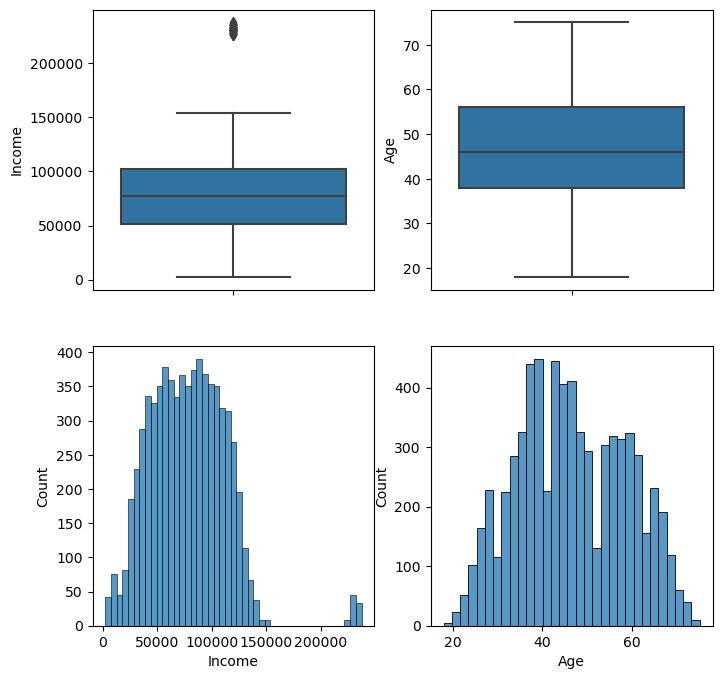

In [15]:
fig, axs = plt.subplots(2,2, figsize=(8, 8))
sns.boxplot(y=demo.Income, ax=axs[0,0])
sns.boxplot( y=demo.Age, ax=axs[0,1])
sns.histplot(data=demo.Income, ax=axs[1,0])
sns.histplot(data=demo.Age, ax=axs[1,1])

demo[demo.Income > 200000]

#### 3.3 Multivariate Analysis
<a id="6"></a> 

- Moderate correlation between Kid_Younger6 and Income

<Axes: >

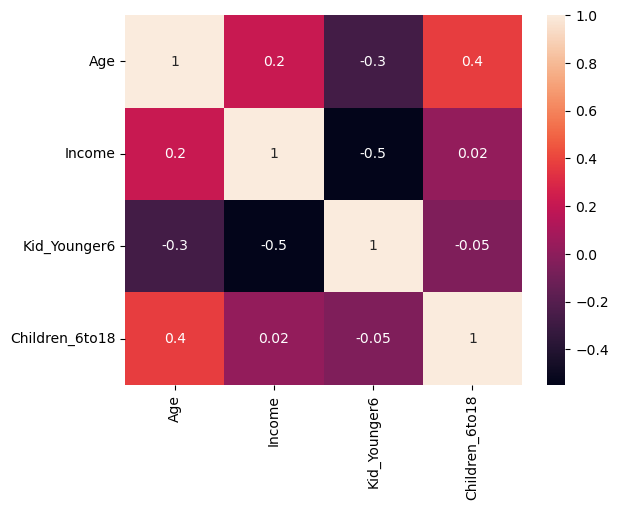

In [16]:
corr = demo[['Age','Income','Kid_Younger6','Children_6to18']].corr(method='spearman')
sns.heatmap(data=corr, annot=True, fmt = '.1g')

# 4. Firmo
<a id="7"></a> 

#### 4.1 Feature Engineering and Data Cleaning
<a id="8"></a> 

##### Duplicates and NA

- Recency - 23 
- MntDrinks - 28

In [17]:
# Check duplicates
sales[sales.duplicated()].shape[0] #were 8
sales.drop_duplicates(inplace=True)
# Check NA - 14 on Education
sales.isnull().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

##### Antiquity Creation - Antiquity
(how many year does the client has the company card)

In [18]:
sales[sales.Date_Adherence.apply(lambda x: isinstance(x, str))]                                         #16 cases of string 2/29/2022
sales.loc[sales.Date_Adherence.apply(lambda x: isinstance(x, str)), 'Date_Adherence'] = '3/01/2022'     # Converted to 3/01/2022 and to datetime object
sales['Date_Adherence'] = pd.to_datetime(sales['Date_Adherence'])
sales['Antiquity'] = datetime.today().year - sales['Date_Adherence'].dt.year

##### Frequency Creation - Freq
(number of purchases multichannel)

In [19]:
sales['Freq'] = sales[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis=1)

##### Total Spent Creation - Mnt_total

In [20]:
sales['Mnt_Total'] = sales[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests']].sum(axis=1)

##### Money spent on average per purchase - Avg_Ticket

In [21]:
sales['Avg_Ticket']= sales.Mnt_Total / sales.Freq

### 4.2 Univariate Analysis
<a id="9"></a> 

In [22]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,6977.0,49.235058,28.922688,0.000000,24.000000,49.000000,74.000000,99.0
MntMeat&Fish,7000.0,3079.523800,3370.377166,0.000000,250.000000,1820.000000,5070.000000,14980.0
MntEntries,7000.0,534.749429,787.846684,0.000000,40.000000,180.000000,680.000000,3980.0
MntVegan&Vegetarian,7000.0,2785.050786,3908.718244,0.000000,240.000000,1110.000000,3795.000000,25974.0
MntDrinks,6972.0,545.657544,805.149088,0.000000,40.000000,180.000000,700.000000,3980.0
MntDesserts,7000.0,540.656029,802.221866,0.000000,40.000000,180.000000,680.000000,3980.0
MntAdditionalRequests,7000.0,42.556186,49.650747,0.000000,9.000000,24.000000,57.000000,249.0
NumOfferPurchases,7000.0,2.448429,2.306968,0.000000,1.000000,2.000000,3.000000,16.0
NumAppPurchases,7000.0,6.015714,2.745537,0.000000,4.000000,6.000000,8.000000,13.0
NumTakeAwayPurchases,7000.0,3.834571,3.331142,0.000000,1.000000,3.000000,5.000000,24.0


In [23]:
#Avg_Ticket  with inf values because there's an inconsistency - 38 costumers who spent money but never went/orderd food from the restaurant
# If we default Freq to 1 - there's 2 high values (+/- 20k) that will skew Avg_Ticket
#Also 2 ppl that went only once but spent +/- 20.5k - will also skew Avg_Ticket

print(sales.loc[(sales.Freq == 0) & (sales.Mnt_Total > 0)].shape, '\n',
sales.loc[(sales.Freq == 1) & (sales.Mnt_Total > 20000)].shape)

(38, 18) 
 (2, 18)


In [24]:
sales.skew(numeric_only=True)[(sales.skew(numeric_only=True).values >1) | (sales.skew(numeric_only=True).values <-1)]


MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumTakeAwayPurchases     2.254158
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

<b> Skewness Interpretation for sales numeric variables </b>


. MntMeat&Fish (skewness = 1.148862): This value suggests that the distribution of spending on meat and fish is moderately skewed to the right. This means that there may be a few high-spending outliers that are driving up the mean spending in this category, while most customers spend less on meat and fish. 

. MntEntries (skewness = 2.087220): This value suggests that the distribution of spending on entries (appetizers or small dishes) is heavily skewed to the right. This means that there are likely many customers who spend very little on entries, while a few customers spend significantly more. 

. MntVegan&Vegetarian (skewness = 2.486897): This value suggests that the distribution of spending on vegan and vegetarian items is heavily skewed to the right. This means that there are likely many customers who spend very little on vegan and vegetarian items, while a few customers spend significantly more.

. MntDrinks (skewness = 2.046308): This value suggests that the distribution of spending on drinks is heavily skewed to the right. This means that there are likely many customers who spend very little on drinks, while a few customers spend significantly more. 

. MntDesserts (skewness = 2.057811): This value suggests that the distribution of spending on desserts is heavily skewed to the right. This means that there are likely many customers who spend very little on desserts, while a few customers spend significantly more. 

. MntAdditionalRequests (skewness = 1.826522): This value suggests that the distribution of spending on additional requests (such as special instructions or requests for extra items) is moderately skewed to the right. This means that there may be a few high-spending outliers that are driving up the mean spending in this category, while most customers spend less on additional requests. 

. NumOfferPurchases (skewness = 2.860514): This value suggests that the distribution of offer purchases is heavily skewed to the right. This means that there are likely many customers who make very few offer purchases, while a few customers make significantly more. 

. NumTakeAwayPurchases (skewness = 2.254158): This value suggests that the distribution of take-away purchases is heavily skewed.

In [25]:
sales.kurt(numeric_only=True)[(sales.kurt(numeric_only=True)>3) | (sales.kurt(numeric_only=True)<-3)]

MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumTakeAwayPurchases      8.582138
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

<b> Kurtosis Interpretation for sales numeric variables </b>

. MntEntries: Kurtosis value of 4.096167 suggests that the distribution of MntEntries is slightly more peaked than a normal distribution, with moderately heavy tails.
. MntVegan&Vegetarian: Kurtosis value of 8.431538 indicates that the distribution of MntVegan&Vegetarian is very peaked and has very heavy tails.

. MntDrinks: Kurtosis value of 3.839256 implies that the distribution of MntDrinks is more peaked than a normal distribution, with moderately heavy tails.

. MntDesserts: Kurtosis value of 3.813464 indicates that the distribution of MntDesserts is more peaked than a normal distribution, with moderately heavy tails.
. MntAdditionalRequests: Kurtosis value of 3.084190 implies that the distribution of MntAdditionalRequests is more peaked than a normal distribution, with moderately heavy tails.

. NumOfferPurchases: Kurtosis value of 10.997946 suggests that the distribution of NumOfferPurchases is very peaked and has very heavy tails.

. NumTakeAwayPurchases: Kurtosis value of 8.582138 indicates that the distribution of NumTakeAwayPurchases is very peaked and has very heavy tails.

. NumAppVisitsMonth: Kurtosis value of 4.992870 suggests that the distribution of NumAppVisitsMonth is slightly more peaked than a normal distribution, with moderately heavy tails.

. Complain: Kurtosis value of 92.299387 indicates that the distribution of Complain is extremely peaked and has extremely heavy tails.

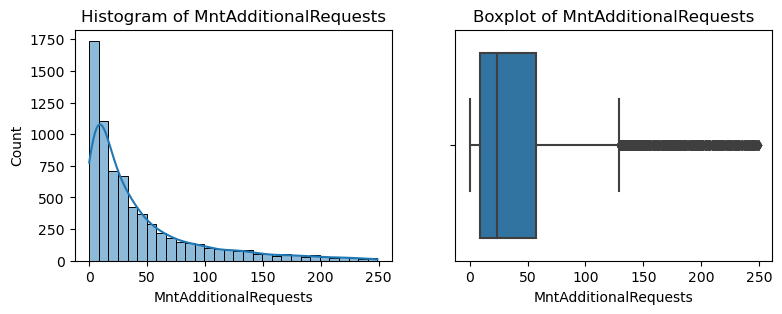

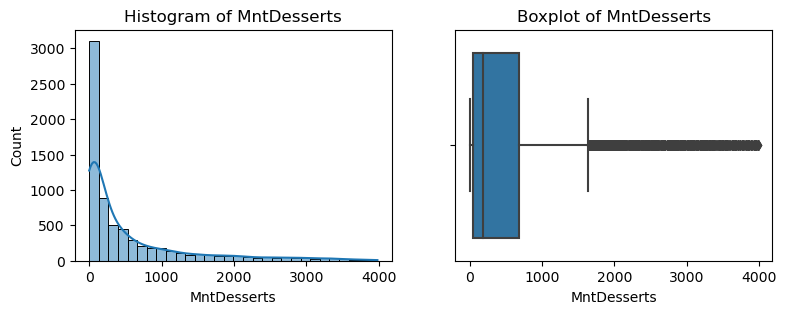

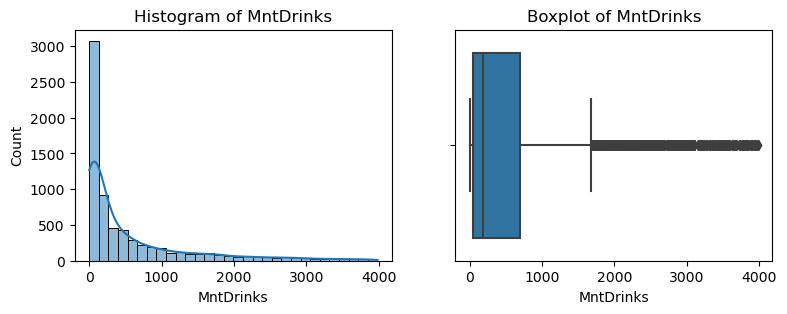

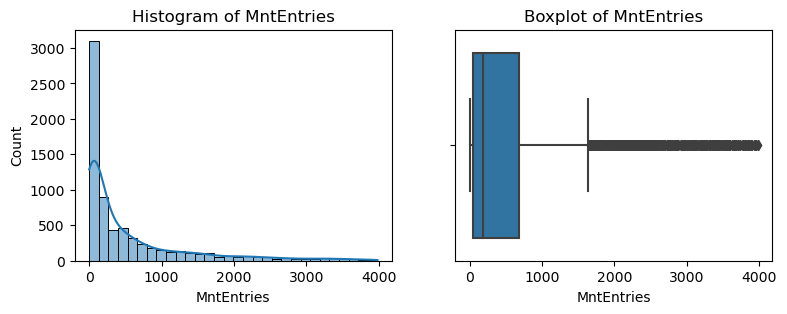

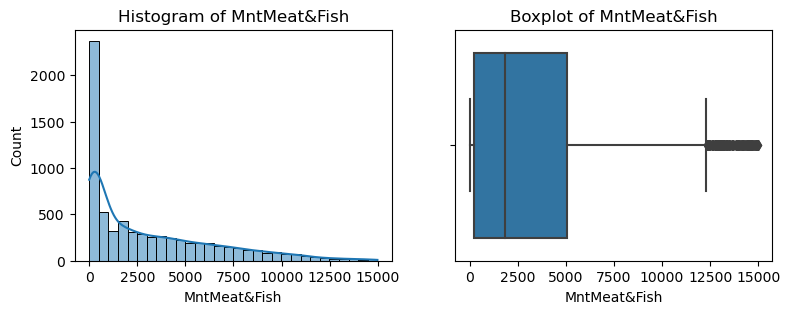

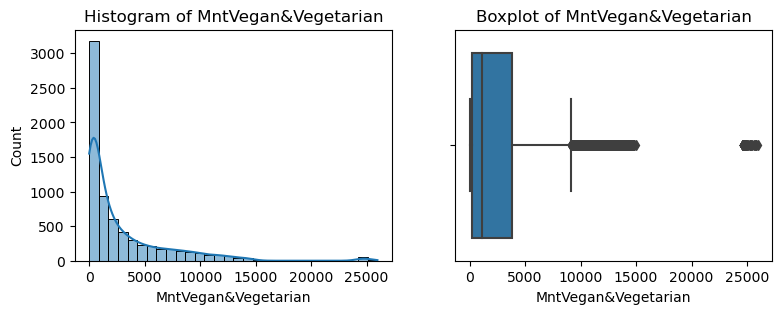

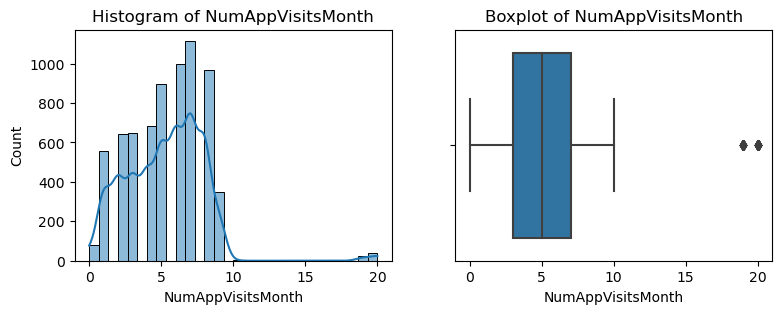

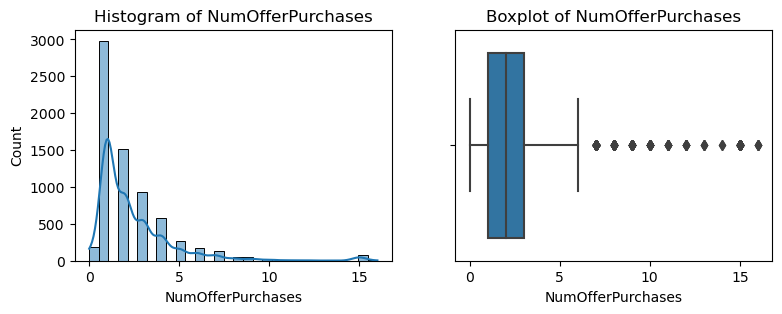

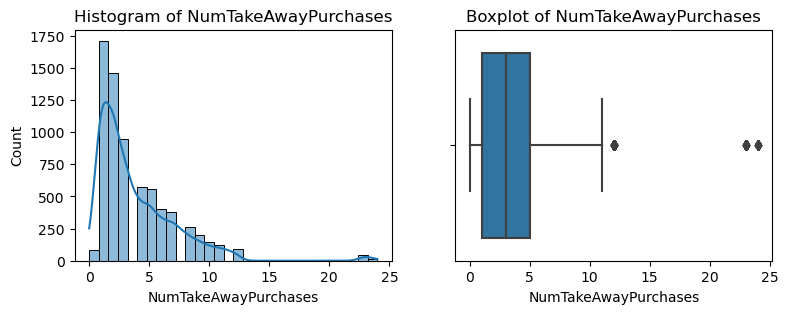

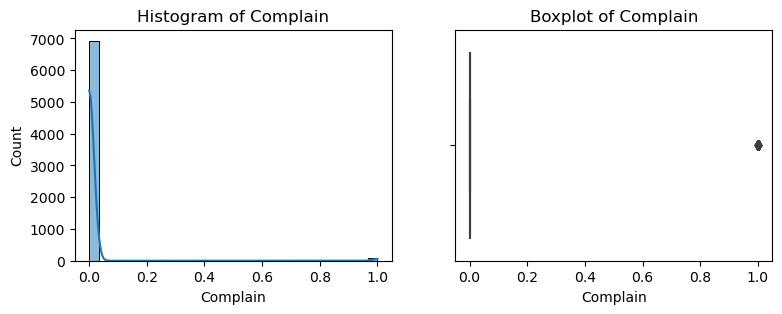

In [26]:
problematic = sales[[
'MntAdditionalRequests',
 'MntDesserts',
 'MntDrinks',
 'MntEntries',
 'MntMeat&Fish',
 'MntVegan&Vegetarian',
 'NumAppVisitsMonth',
 'NumOfferPurchases',
 'NumTakeAwayPurchases',
 'Complain']]

for i in problematic:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()


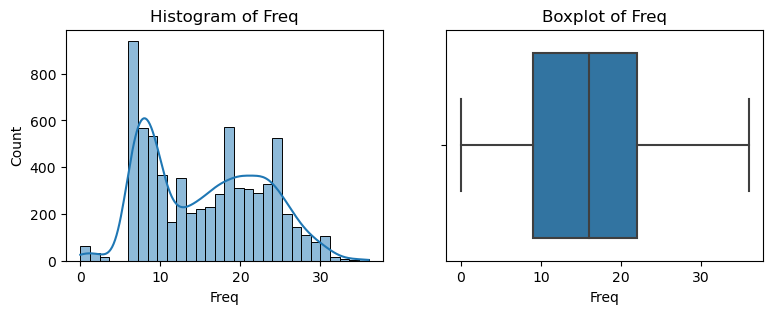

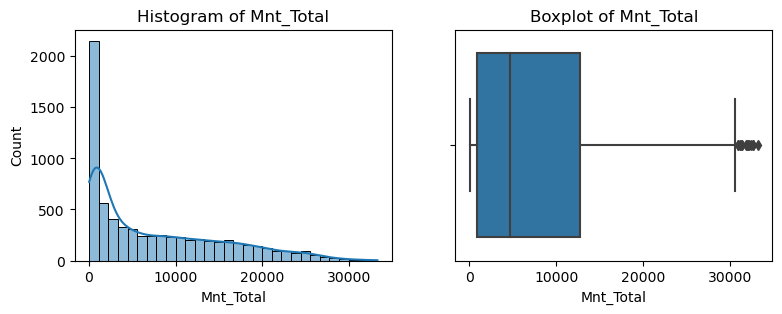

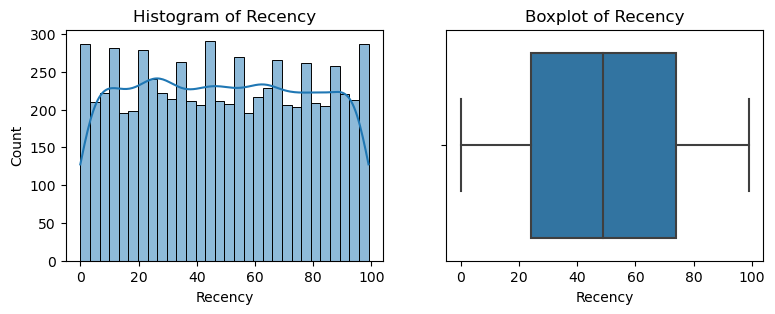

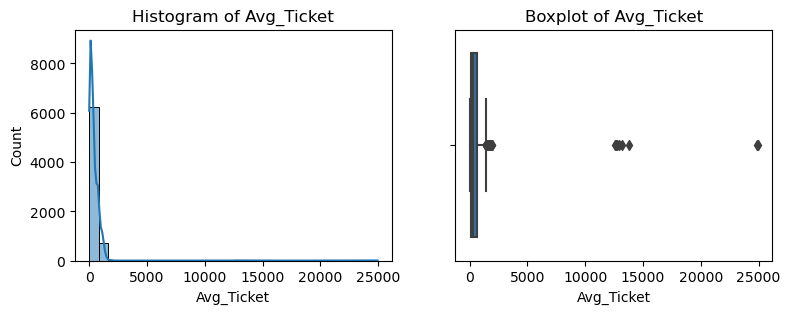

In [27]:
a = sales[[
'Freq',
'Mnt_Total',
'Recency',
'Avg_Ticket']]

for i in a:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()

Conclusions:
- Freq, Mnt_Total, Avg_Ticket and Recency after outlier removal and maybe transformation (to help normalize) seem good indicators of costumer behavior for the model
- If we want to use the other variables to: cluster by type of food; cluster by type of channel used - we clearly have to apply a transformation technique (besides removing outliers)
* We can also try :
    - an aproach of ratios  mapping 1 to a costumer who as a higher ratio of meat by total purchases and 0 on the other food types (same with channel)
    - investigate a possible relation between beverage and dessert consumption and other behaviors...(thinking in marketing terms, like does it make sense to advertise or give drink coupon to try to rise sales in x group)
    - Investigate if there are ppl who visit the app many times but don't buy nothing - possible bottleneck - ux sucks? possible marketing campaign dedicated to those cases

### 4.3 Multivariate Analysis
<a id="9"></a> 

C:\Users\rafae\AppData\Local\Temp\ipykernel_17172\1593738059.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_corr = sales.corr(method = 'spearman')[(sales.corr(method = 'spearman') > 0.5) | (sales.corr(method = 'spearman') < -0.5)]


<Axes: >

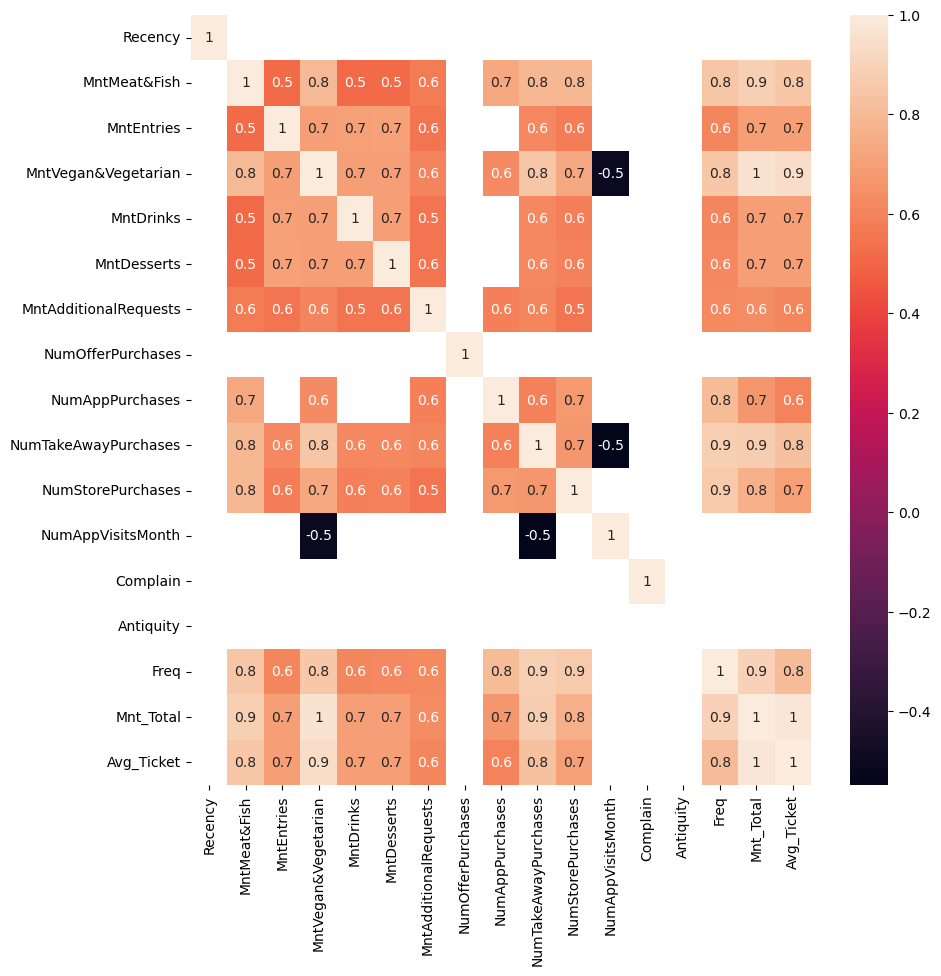

In [28]:
#Suggests that specific vars(by type of food and channel used) and sum total vars(Freq, Mnt_Total, Avg_Ticket) 
# are two different approaches and doesn't make sense when used together
plt.figure(figsize=(10,10))
sales_corr = sales.corr(method = 'spearman')[(sales.corr(method = 'spearman') > 0.5) | (sales.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_corr, annot=True, fmt = '.1g')

<Axes: >

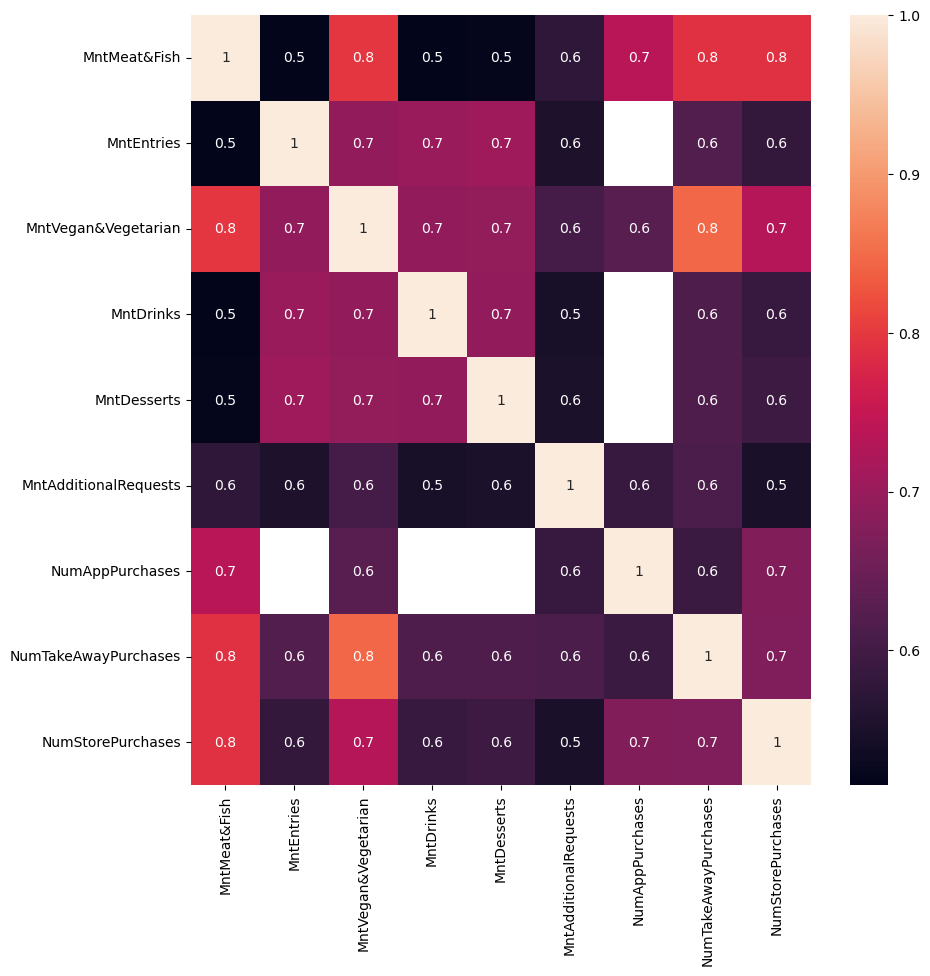

In [29]:
# Only corrs between "types of food" and channels
# High correlations all around
sales_foodtype_channel = sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases']]

plt.figure(figsize=(10,10))
sales_foodtype_channel_corr = sales_foodtype_channel.corr(method = 'spearman')[(sales_foodtype_channel.corr(method = 'spearman') > 0.5) | (sales_foodtype_channel.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_foodtype_channel_corr, annot=True, fmt = '.1g')

<Axes: >

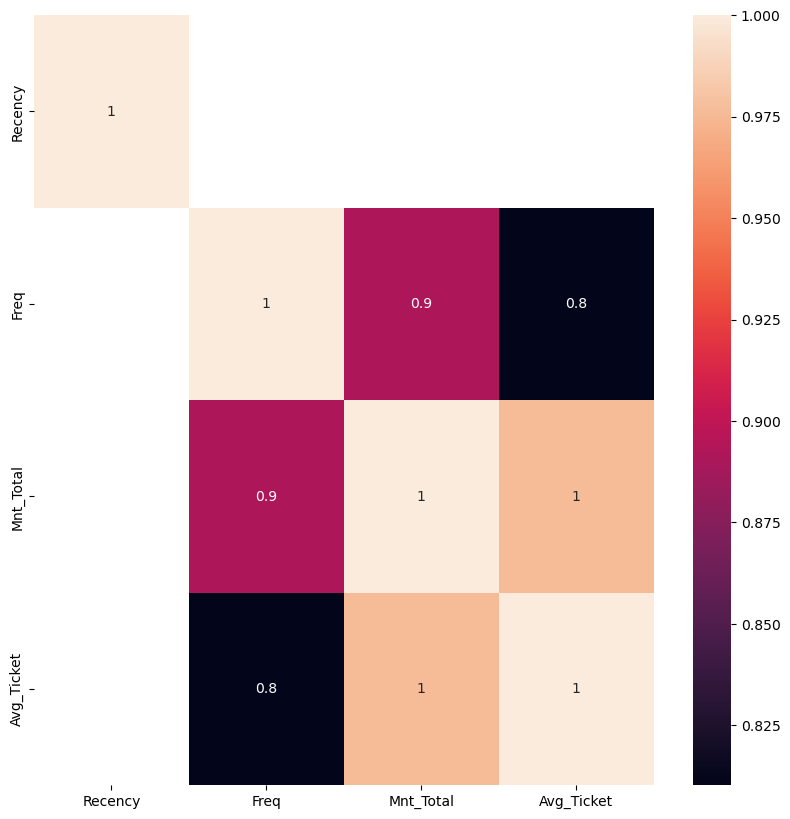

In [30]:
# Corrs between "sumed vars"
# Also high correlation - expected
sales_sums = sales[['Recency', 'Freq', 'Mnt_Total', 'Avg_Ticket']]

plt.figure(figsize=(10,10))
sales_sums_corr = sales_sums.corr(method = 'spearman')[(sales_sums.corr(method = 'spearman') > 0.5) | (sales_sums.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_sums_corr, annot=True, fmt = '.1g')

<Axes: xlabel='Mnt_Total', ylabel='Freq'>

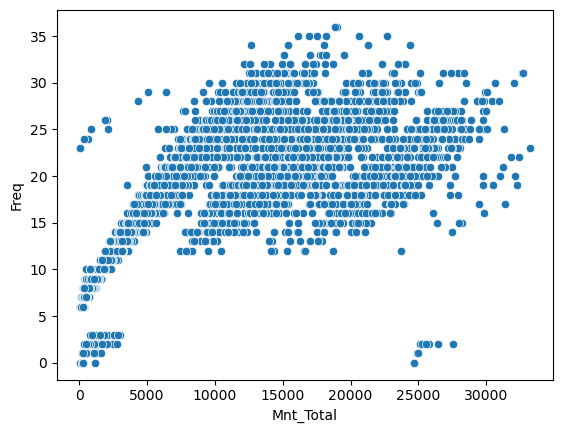

In [31]:
# Here's the clusters boys! *mic drop* i guess...
# Bit of trash around and outliers
#Maybe we should give DBSCAN a go bcs elipse shapes
sns.scatterplot( x=sales.Mnt_Total, y=sales.Freq)

In [32]:
# Way to test for multicollinearity - need to treat nulls first to check other vars ( if not above 5 we're good)
from statsmodels.stats.outliers_influence import variance_inflation_factor
sales_mc= sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian',  'MntDesserts',
       'MntAdditionalRequests']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = sales_mc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(sales_mc.values, i)
                          for i in range(len(sales_mc.columns))]
vif_data


,feature,VIF
0,MntMeat&Fish,2.461759
1,MntEntries,2.407168
2,MntVegan&Vegetarian,2.261687
3,MntDesserts,2.419244
4,MntAdditionalRequests,2.036670


In [33]:
#Possible inconsistence, no visits on avg but at least 1 app purchase
sales[(sales.NumAppVisitsMonth == 0) & (sales.NumAppPurchases >0)].shape

(57, 18)

# 5. Marketing Campaigns

### 5.1 Feature Engineering and Data Cleaning

In [34]:
mkt.shape

(7023, 5)

In [35]:
# Check duplicates - 23 duplicate index - If they are duplicates, does it mean the marketing campaign was sent twice to the customer with that ID?
print(len(mkt.index.unique())-mkt.shape[0])
# Check NA - 0
print(mkt.isnull().sum())

-23
Response_Cmp1    0
Response_Cmp2    0
Response_Cmp3    0
Response_Cmp4    0
Response_Cmp5    0
dtype: int64


In [36]:
mkt.describe()

,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
count,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,0.079453,0.073473,0.083013,0.065926,0.014239
std,0.270464,0.260930,0.275921,0.248171,0.118483
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7023 entries, 31958 to 16466
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Response_Cmp1  7023 non-null   int64
 1   Response_Cmp2  7023 non-null   int64
 2   Response_Cmp3  7023 non-null   int64
 3   Response_Cmp4  7023 non-null   int64
 4   Response_Cmp5  7023 non-null   int64
dtypes: int64(5)
memory usage: 587.2 KB


In [38]:
mkt.head()

,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,
31958,0,0,0,0,0
5387,0,0,0,0,0
32006,0,0,0,0,0
7511,0,0,0,0,0
12308,0,0,0,0,0


We will use all of these without much change! If some are highly correlated with others we might group them
I see us using a decision tree to see which marketing campaign to use per segment

# Channel Preference Segmentation - Kmeans (with Kmeans++ init)

Channels: 
NumAppPurchases
NumTakeAwayPurchases
NumInStorePurchases

Method: 
-Convert Freq of each channel to %

Segmentation:
Demo

In [39]:
#Variable Selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

demo.head()#drop Name, Birthyear, Education, Income, check with and without kids maybe, Marital_status and create two sets with MS_2 and another with MS_4, Age needs some work

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins
CustomerID,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,F,42,Medium,Alone,Single,Medium
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,F,49,Medium,Together,Married,Medium
29888,Mr. Gavin Morrison,1960,Phd,Together,115476.0,0,0,M,63,High,Together,Married,Medium
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,M,43,Medium,Together,Married,Medium
21107,Mr. Paul Anderson,1971,Highschool,Single,123128.0,0,0,M,52,Low,Alone,Single,Medium


            Kid_Younger6  Children_6to18 Gender Education Marital_Status_2  \
CustomerID                                                                   
14594                  0               0      F    Medium            Alone   
19070                  0               0      F    Medium         Together   
29888                  0               0      M      High         Together   
12221                  1               1      M    Medium         Together   
21107                  0               0      M       Low            Alone   

           Income_bins   Age_Groups  
CustomerID                           
14594           Medium        Adult  
19070           Medium        Adult  
29888           Medium  Older Adult  
12221           Medium        Adult  
21107           Medium        Adult   Kid_Younger6        0
Children_6to18      0
Gender              0
Education           0
Marital_Status_2    0
Income_bins         0
Age_Groups          0
dtype: int64


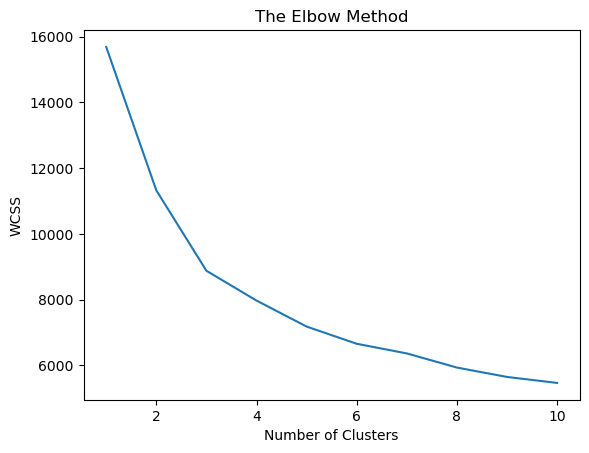

In [40]:
#Create new df with only relevant demo variables
demo_k = demo.copy(deep=True)
demo_k["Age_Groups"] = pd.cut(demo_k.Age, bins=3, labels=["Young Adult", "Adult", "Older Adult"])
demo_k.drop(columns = ["Name", "Birthyear", "Education", "Marital_Status", "Marital_Status_4", "Income","Age"], inplace = True)
demo_k.rename(columns={"Education_bins" : "Education"}, inplace = True)
demo_k.fillna(method = "ffill", inplace = True)
#demo_k.reset_index(drop = True, inplace = True)
print(demo_k.head(),demo_k.isna().sum())

Y = sales[["NumOfferPurchases","NumAppPurchases","NumTakeAwayPurchases","NumStorePurchases"]]
Y = Y.apply(lambda x: x/x.sum(), axis=1)
Y.fillna(method = "ffill", inplace = True)

# create an instance of the OrdinalEncoder class
encoder = OrdinalEncoder()

# fit and transform the encoder on the DataFrame
X = pd.DataFrame(encoder.fit_transform(demo_k), columns=demo_k.columns)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train, y_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
#We choose 3 - 4 

In [42]:
# Initialize KMeans with the 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++")

# Fit the data to the KMeans model
kmeans.fit(X_train, y_train)

# Get the centroids and labels
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

# Calculate the Silhouette score for the clustering
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette score:", "A score of ",silhouette, "indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters")
# Calculate performance metrics
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print("Calinski-Harabasz Index:",ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Davies-Bouldin Index:",db_score, "suggesting that the k-means algorithm has produced relatively good clustering performance")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: A score of  0.2900970402491518 indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters
Calinski-Harabasz Index: 2147.0974894708784  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Davies-Bouldin Index: 1.3292770622033523 suggesting that the k-means algorithm has produced relatively good clustering performance


In [43]:
# Initialize KMeans with the 4 clusters
kmeans = KMeans(n_clusters=4, init="k-means++")

# Fit the data to the KMeans model
kmeans.fit(X_train, y_train)

# Get the centroids and labels
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

# Calculate the Silhouette score for the clustering
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette score:", "A score of ",silhouette, "indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters")
# Calculate performance metrics
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print("Calinski-Harabasz Index:",ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Davies-Bouldin Index:",db_score, "suggesting that the k-means algorithm has produced relatively good clustering performance")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: A score of  0.25062479505696167 indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters
Calinski-Harabasz Index: 1819.439034032252  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Davies-Bouldin Index: 1.5268561990000944 suggesting that the k-means algorithm has produced relatively good clustering performance


In [44]:
demo_k2 = demo.copy(deep=True)
demo_k2["Age_Groups"] = pd.cut(demo_k2.Age, bins=3, labels=["Young Adult", "Adult", "Older Adult"])
demo_k2.drop(columns = ["Name", "Birthyear", "Education", "Marital_Status", "Marital_Status_2", "Income","Age"], inplace = True)
demo_k2.rename(columns={"Education_bins" : "Education"}, inplace = True)
demo_k2.fillna(method = "ffill", inplace = True)
#demo_k.reset_index(drop = True, inplace = True)
print(demo_k.head(),demo_k.isna().sum())

# create an instance of the OrdinalEncoder class
encoder = OrdinalEncoder()

# fit and transform the encoder on the DataFrame
X = pd.DataFrame(encoder.fit_transform(demo_k2), columns=demo_k2.columns)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

            Kid_Younger6  Children_6to18 Gender Education Marital_Status_2  \
CustomerID                                                                   
14594                  0               0      F    Medium            Alone   
19070                  0               0      F    Medium         Together   
29888                  0               0      M      High         Together   
12221                  1               1      M    Medium         Together   
21107                  0               0      M       Low            Alone   

           Income_bins   Age_Groups  
CustomerID                           
14594           Medium        Adult  
19070           Medium        Adult  
29888           Medium  Older Adult  
12221           Medium        Adult  
21107           Medium        Adult   Kid_Younger6        0
Children_6to18      0
Gender              0
Education           0
Marital_Status_2    0
Income_bins         0
Age_Groups          0
dtype: int64


In [45]:
# Initialize KMeans with the 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++")

# Fit the data to the KMeans model
kmeans.fit(X_train, y_train)

# Get the centroids and labels
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

# Calculate the Silhouette score for the clustering
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette score:", "A score of ",silhouette, "indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters")
# Calculate performance metrics
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print("Calinski-Harabasz Index:", ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Calinski-Harabasz Index:",ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Davies-Bouldin Index:",db_score, "suggesting that the k-means algorithm has produced relatively good clustering performance")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: A score of  0.27509006637818884 indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters
Calinski-Harabasz Index: 1928.936039346626  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Calinski-Harabasz Index: 1928.936039346626  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Davies-Bouldin Index: 1.388253115369915 suggesting that the k-means algorithm has produced relatively good clustering performance


In [46]:
# Initialize KMeans with the 4 clusters
kmeans = KMeans(n_clusters=4, init="k-means++")

# Fit the data to the KMeans model
kmeans.fit(X_train, y_train)

# Get the centroids and labels
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

# Calculate the Silhouette score for the clustering
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette score:", "A score of ",silhouette, "indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters")
# Calculate performance metrics
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print("Calinski-Harabasz Index:",ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Davies-Bouldin Index:",db_score, "suggesting that the k-means algorithm has produced relatively good clustering performance")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: A score of  0.23574028627643057 indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters
Calinski-Harabasz Index: 1619.7046819414713  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Davies-Bouldin Index: 1.5997466108204548 suggesting that the k-means algorithm has produced relatively good clustering performance


In [ ]:
#Better with Marital Status_2 and 3 Clusters let's check with PCA

In [48]:
#PCA prep

X = pd.DataFrame(encoder.fit_transform(demo_k), columns=demo_k.columns)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)




In [49]:
# Initialize KMeans with the 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++")

# Fit the data to the KMeans model
kmeans.fit(X_train, y_train)

# Get the centroids and labels
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

# Calculate the Silhouette score for the clustering
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette score:", "A score of ",silhouette, "indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters")
# Calculate performance metrics
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print("Calinski-Harabasz Index:", ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Calinski-Harabasz Index:",ch_score, " this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.")
print("Davies-Bouldin Index:",db_score, "suggesting that the k-means algorithm has produced relatively good clustering performance")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: A score of  0.2958067600402657 indicates that the clustering is reasonably good, with the data points fitting well into their assigned clusters
Calinski-Harabasz Index: 2129.429689050992  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Calinski-Harabasz Index: 2129.429689050992  this value suggests the k-means algorithm has produced well-defined clusters with good separation between them.
Davies-Bouldin Index: 1.33083668599427 suggesting that the k-means algorithm has produced relatively good clustering performance


### 5.1 Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
demo.head()

In [ ]:
#demo.drop(columns = "Name", "Birthyear")

In [ ]:
#demo.drop(columns = ["Marital_Status","Marital_Status_2"], axis = 1, inplace = True)
demo["Marital_Status_4"].unique()

In [ ]:
sales.head()

In [ ]:
sales.drop(columns = "Date_Adherence", axis = 1, inplace = True)2

In [ ]:
#merge on index all ID's that match

In [ ]:
#Apply decision tree
#Apply random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#going for it with as many variables as I can